请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,make_scorer
import seaborn as sns
#解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['FZSongYi-Z13S']
#解决负号无法正常显示的问题
plt.rcParams['axes.unicode_minus']=False


In [10]:
data=pd.read_csv("华南地区.csv")
data

,ID,注册时长,营收收入,成本,是否续约
0,10001,29,46,8.33316,续约
1,10002,58,105,18.24564,续约
2,10003,36,55,3.13296,续约
3,10004,32,28,9.96705,续约
4,10005,26,32,7.19040,不续约
...,...,...,...,...,...
1495,11496,36,87,9.76910,续约
1496,11497,39,45,1.65636,续约
1497,11498,26,17,0.54784,续约
1498,11499,36,43,6.36115,续约


划分训练集与测试集

In [4]:
x=data[["注册时长","营收收入","成本"]]
y=data[["是否续约"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print(len(x_train))
print(len(x_test))

1050
450


In [5]:
#创建KNN模型
knnModel=KNeighborsClassifier(n_neighbors=3)  #把K设置为3
knnModel.fit(x_train,y_train)
score=knnModel.score(x_test,y_test)  #模型得分
print("模型得分：{}".format(score))

模型得分：0.6377777777777778


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


模型评估

准确率：0.6377777777777778，精确率：0.6875，召回率：0.7545126353790613，F1：0.7194492254733217


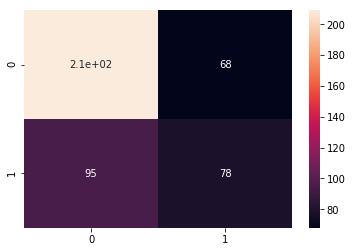

In [6]:
#使用测试集预测结果
y_test_predict=knnModel.predict(x_test)
y_test_predict
#混淆矩阵
c_matrix=confusion_matrix(y_true=y_test,y_pred=y_test_predict,labels=["续约","不续约"])
sns.heatmap(c_matrix,annot=True)  #用热力图展示混淆矩阵
#计算准确率
acc=accuracy_score(y_true=y_test,y_pred=y_test_predict)
#计算精确率
precision=precision_score(y_true=y_test,y_pred=y_test_predict,pos_label="续约")
#计算召回率
recall=recall_score(y_true=y_test,y_pred=y_test_predict,pos_label="续约")
#计算f1
F1=f1_score(y_true=y_test,y_pred=y_test_predict,pos_label="续约")
print("准确率：{}，精确率：{}，召回率：{}，F1：{}".format(acc,precision,recall,F1))

K折交叉验证

In [12]:
#10次的得分，默认得分是计算准确度
kcvs=cross_val_score(knnModel,x,y,cv=10) #默认得分是计算准确度
kcvs
kcvs_mean=kcvs.mean()  #求出10次得分的平均值
kcvs_mean

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/si

0.6826666666666666

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/si

([<matplotlib.axis.XTick at 0x7fbd84e5c110>,
 <a list of 28 Text xticklabel objects>)

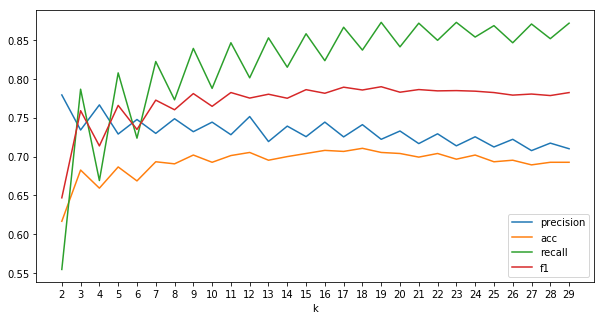

In [14]:
#保存K
ks=[]
#保存准确率
acc_means=[]
#精确率
precision_means=[]
#召回率
recall_means=[]
#F1
f1_means=[]
for k in range(2,30):
    ks.append(k) #把当前k值加入数组ks
    knnModel=KNeighborsClassifier(n_neighbors=k)  #以当前k值生成KNN模型
    #计算10折交叉验证的准确率
    acc_kcvs=cross_val_score(
        knnModel,x,y,cv=10,scoring=make_scorer(accuracy_score)
    )
    #将10折交叉验证的准确率的均值保存起来
    acc_means.append(acc_kcvs.mean())

    #计算10折交叉验证的精确率
    precision_kcvs=cross_val_score(
        knnModel,x,y,cv=10,scoring=make_scorer(precision_score,pos_label="续约")
    )
    #将10折交叉验证的精确率的均值保存起来
    precision_means.append(precision_kcvs.mean())

    #计算10折交叉验证的召回率
    recall_kcvs=cross_val_score(
        knnModel,x,y,cv=10,scoring=make_scorer(recall_score,pos_label="续约")
    )
    #将10折交叉验证的召回率的均值保存起来
    recall_means.append(recall_kcvs.mean())

    #计算10折交叉验证的F1
    f1_kcvs=cross_val_score(
        knnModel,x,y,cv=10,scoring=make_scorer(f1_score,pos_label="续约")
    )
    #将10折交叉验证的F1的均值保存起来
    f1_means.append(f1_kcvs.mean())
#生成对应的评分模型
score=pd.DataFrame({
    "k":ks,
    "precision":precision_means,
    "acc":acc_means,
    "recall":recall_means,
    "f1":f1_means
})
#figsize=(10,5)设定画布大小
score.plot(x="k",y=["precision",'acc',"recall","f1"],figsize=(10,5))
#设定x轴刻度
plt.xticks(range(2,30))


预测未知数据

In [51]:
knnModel=KNeighborsClassifier(n_neighbors=17)#使用K=17创建KNN模型
knnModel.fit(x,y)#使用华南数据进行训练
#使用华北数据进行预测
data_north=pd.read_csv("华北地区.csv")
print(data_north.describe())
data_north["预测预约"]=knnModel.predict(data_north[["注册时长","营收收入","成本"]])  #预测是否续约
data_north

                 ID        注册时长        营收收入          成本
count    325.000000  325.000000  325.000000  325.000000
mean   20163.000000   33.833846   56.769231    6.200387
std       93.963645   10.973738   51.103311    7.912646
min    20001.000000   19.000000   13.000000    0.513600
25%    20082.000000   25.000000   28.000000    1.737680
50%    20163.000000   33.000000   40.000000    3.707550
75%    20244.000000   40.000000   64.000000    7.549920
max    20325.000000   68.000000  448.000000   71.801280


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


,ID,注册时长,营收收入,成本,预测预约
0,20001,29,46,8.33316,不续约
1,20002,26,32,7.19040,不续约
2,20003,59,172,10.11150,续约
3,20004,22,24,0.95979,续约
4,20005,56,87,17.97600,续约
...,...,...,...,...,...
320,20321,21,22,2.08971,续约
321,20322,36,62,11.74218,续约
322,20323,32,29,4.73368,续约
323,20324,28,66,0.67410,续约
